In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('pluton.csv')
data.head()

,Pu238,Pu239,Pu240,Pu241
0,0.126,75.804,21.204,2.180
1,0.133,75.515,21.408,2.240
2,0.127,75.175,21.668,2.305
3,0.156,78.872,18.428,1.906
4,0.503,73.317,20.223,4.128


In [3]:
scaler = StandardScaler()
stand_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
stand_data.head()

,Pu238,Pu239,Pu240,Pu241
0,-1.048768,0.832106,-0.138176,-1.056029
1,-1.036442,0.791133,-0.052625,-1.035913
2,-1.047007,0.742931,0.056409,-1.014121
3,-0.995944,1.267063,-1.302330,-1.147892
4,-0.384949,0.479518,-0.549572,-0.402930


In [4]:
max_iters = np.linspace(1, 10, 10)
inertias = np.zeros((max_iters.size, 2))
labels = np.zeros((max_iters.size, data.shape[0]))
stand_labels = np.copy(labels)
for i, max_iter in enumerate(max_iters):
    model = KMeans(n_clusters=3, max_iter=int(max_iter), random_state=1, init='random').fit(data)
    inertias[i, 0] = model.inertia_
    labels[i] = model.labels_
    
#     print(model.cluster_centers_)
#     print(model.inertia_)
    stand_model = KMeans(n_clusters=3, max_iter=int(max_iter), random_state=1, init='random').fit(stand_data)
    inertias[i, 1] = stand_model.inertia_
    stand_labels[i] = stand_model.labels_

In [5]:
np.all(labels == stand_labels)

False

In [16]:
print("MAX Iterations\t Non-standard data\t Standard data")
for i, max_iter in enumerate(max_iters):
    print(max_iters[i], '\t\t', inertias[i, 0],
          '\t', inertias[i, 1])

MAX Iterations	 Non-standard data	 Standard data
1.0 		 260.87930639463525 	 23.10716870316836
2.0 		 253.46507513888892 	 18.271529091629443
3.0 		 234.67204484994156 	 18.271529091629443
4.0 		 231.17466762499996 	 18.271529091629443
5.0 		 231.17466762499996 	 18.271529091629443
6.0 		 231.17466762499996 	 18.271529091629443
7.0 		 231.17466762499996 	 18.271529091629443
8.0 		 231.17466762499996 	 18.271529091629443
9.0 		 231.17466762499996 	 18.271529091629443
10.0 		 231.17466762499996 	 18.271529091629443


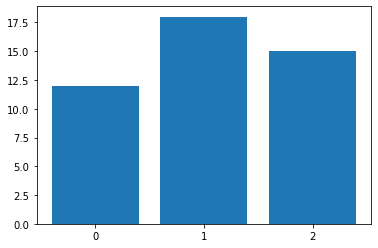

In [7]:
x, y = np.unique(labels[0], return_counts=True)
plt.bar(x, y)
_ = plt.xticks([0, 1, 2])

In [8]:
labels[0]

array([1., 1., 1., 1., 0., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1.,
       1., 1., 1., 2., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 2., 2., 2., 2., 2., 0., 0., 1., 2.])

In [9]:
stand_labels[0]

array([2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       2., 2., 2., 0., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2.,
       2., 2., 0., 0., 0., 0., 0., 2., 2., 2., 0.])

In [10]:
stand_model.cluster_centers_

array([[ 0.67798387,  0.03543992, -1.2636083 ,  0.78475027],
       [-0.89741301,  0.81525825, -0.43214971, -0.89535274],
       [ 1.16466728, -1.31858916,  1.19688286,  1.11866428]])